<a href="https://colab.research.google.com/github/songmac/2023-Sesac-Lecture-and-Project/blob/master/231018_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%A4%EC%8A%B5(solving_version_issue).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2. 리뷰데이터로 토픽모델링 -LDA

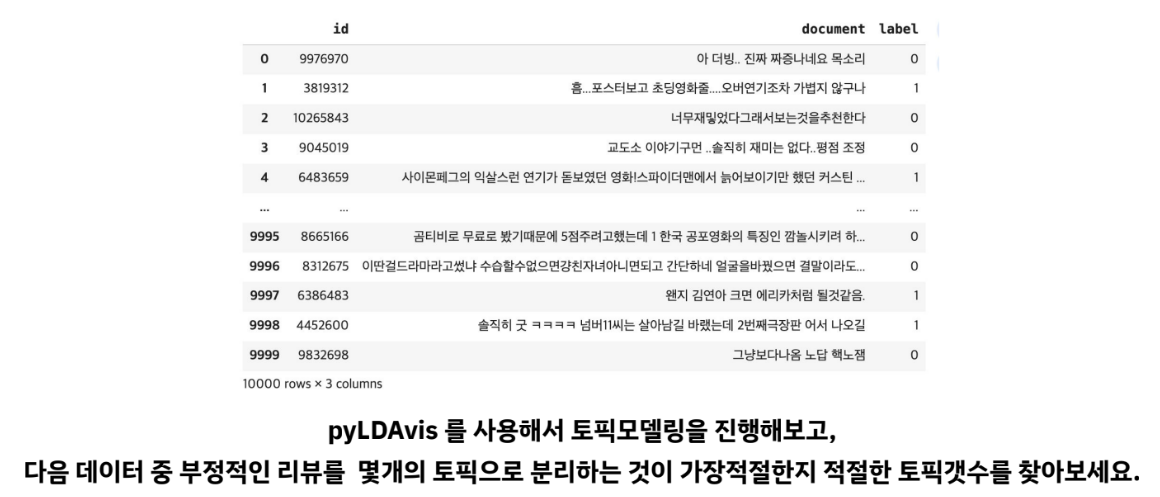

In [ ]:
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')
#참고) 다시 출력하게 하기
# warnings.filterwarnings(action='default')

In [ ]:
#구글드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#내가 만든 csv 파일 불러오기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실습/data/review.csv', delimiter='\t')
print(df)

            id                                           document  label
0      9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1      3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2     10265843                                  너무재밓었다그래서보는것을추천한다      0
3      9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4      6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...        ...                                                ...    ...
9995   8665166  곰티비로 무료로 봤기때문에 5점주려고했는데 1 한국 공포영화의 특징인 깜놀시키려 하...      0
9996   8312675  이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도...      0
9997   6386483                              왠지 김연아 크면 에리카처럼 될것같음.      1
9998   4452600          솔직히 굿 ㅋㅋㅋㅋ 넘버11씨는 살아남길 바랬는데 2번째극장판 어서 나오길      1
9999   9832698                                      그냥보다나옴 노답 핵노잼      0

[10000 rows x 3 columns]


In [ ]:
df = df[:100] #(id, document, label column) 있음
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
95,8763660,어내스트와 셀레스틴 완전 강추에요~ 정말 재밌습니다^^,1
96,9361974,재미있는영화입니다.,1
97,7928957,클라라볼라고화신본거아닌데,0
98,10250221,진짜 보면서 너무 슬펐던 영화다,1


In [ ]:
# konlpy 설치와 분석
# ! pip install konlpy

In [ ]:
#리뷰 내용 첫번째 줄 확인
sample_text = df['document'].iloc[0]
print(type(sample_text))
print(sample_text)

<class 'str'>
아 더빙.. 진짜 짜증나네요 목소리


In [ ]:
#한국어 분석 라이브러리 호출
from konlpy.utils import pprint
from konlpy.tag import Okt

okt = Okt()
print(okt)

In [ ]:
#pos 로 품사 태깅
tokens = okt.pos(sample_text)
pprint(tokens)

[('아', 'Exclamation'),
 ('더빙', 'Noun'),
 ('..', 'Punctuation'),
 ('진짜', 'Noun'),
 ('짜증나네요', 'Adjective'),
 ('목소리', 'Noun')]


In [ ]:
#morphs 로 모든 형태소 반환, nouns 로 명사만 반환
tokens = okt.morphs(sample_text)
pprint(tokens)

['아', '더빙', '..', '진짜', '짜증나네요', '목소리']


In [ ]:
tokens = okt.nouns(sample_text)
pprint(tokens)

['더빙', '진짜', '목소리']


In [ ]:
#결측지 있다면 제거
review_data = df['document'].dropna().values

#review_data 1줄만 확인
print(review_data.shape)
print(review_data[0],'\n')

(100,)
아 더빙.. 진짜 짜증나네요 목소리 



In [ ]:
# 모든 리뷰의 3글자 이상 명사 추출하기
cleaned_review_data = []

for review in (review_data):
  tokens = okt.nouns(review)
  cleaned_tokens = []

  for word in tokens:
    if len(word) > 1:
      cleaned_tokens.append(word)
    else:
      pass
  cleaned_review = " ".join(cleaned_tokens)
  cleaned_review_data.append(cleaned_review)

print(len(cleaned_review_data))
print(cleaned_review_data)

100
['더빙 진짜 목소리', '포스터 보고 초딩 영화 오버 연기', '무재 밓었 다그 래서 추천', '교도소 이야기 구먼 재미 평점 조정', '몬페 연기 영화 스파이더맨 커스틴 던스트', '걸음 초등학교 학년 생인 영화 반개', '원작 긴장감 제대로', '반개 이응경 길용우 생활 정말 해도 그것 납치 감금 반복 반복 드라마 가족 연기 사람', '액션 재미 영화', '왜케 평점 헐리우드', '인피니트 진짜', '볼때 향수 자극 허진호 감성 절제 멜로 달인', '울면 횡단보도 이범수 연기', '로만 자꾸 사람', '취향 존중 다지 진짜 내생 극장 영화 가장 노잼 감동 스토리 어거지 감동 어거지', '매번 긴장 재밋음', '사람 바스코 이기 락스 바비 이기 아이돌 그냥 안달', '굿바이 레닌 표절 이해 갈수록 재미', '이건 정말 깨알 캐스팅 질퍽 용구성 버무러진 깨알 일드', '약탈 변명 절대', '나름 그냥 학생 선생 영화 절대', '', '음식 영화 바베트 만찬 바베트 만찬 이야기 음식 재미 이건 음식 별로 핀란드 풍경 할랫 그것 별로', '절대 영화 수작 는걸', '주제 중반', '짤랐을꺼 납득', '고추', '카밀라 발연기', '재밋는뎅', '센스 연출 캐스팅 향수', '엄포스 위력 다시 한번 검사 연기 정말 완전 명품 드라마', '쓰레기 도안 시간', '', '죄인 죄인', '드라마 인생 최고', '패션 대한 열정 안나 투어', '키이라 나이틀리 연기 대체 정신장애 틱장애', '원작 정신 유령', '포스터 관객', '영화 평가', '매력 영화', '알바생 내용 하나 완전 영화 시간 완전 낚임', '서리', '정말 방법', '윤제문 배우 발견 미소 머금 음악 조금 평점', '평점 속지 시간 낭비 낭비', '리얼리티 공감 간다 이민기 캐릭터 정신의학 분노조절 장애 초기 증상 툭하면 사람 물건 파손 조금 초반 가면 갈수록 이민기 정신 상태 공감 불가', '마이너스 뮤비 보고 영화 수준 북한', '우리 영화 사랑', '리스 타르 용의 주인 근친상간 소설 제일

In [ ]:
# TfidVectorizer 활용 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
review_tfid = tfid.fit_transform(review_data)

print(review_tfid.shape)
print(review_tfid[0])

(100, 649)
  (0, 222)	0.5267968789369872
  (0, 567)	0.5267968789369872
  (0, 564)	0.4092128358528695
  (0, 162)	0.5267968789369872


In [ ]:
tfid.get_feature_names_out()

array(['10점', '114명이네', '120부작이라니', '1학년생인', '3분만에', '3세부터', '70회중반인데',
       '8살용영화', '8점', '90년대의', '9점', 'kl2g', 'mama나가면', 'oo', 'oo걸', 'ㄱ냥',
       'ㅇ내ㅇ시간', 'ㅈㅈ', 'ㅉㅉ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅜㅜ', 'ㅜㅡ', 'ㅡㅡ', '가고', '가르엔',
       '가면', '가볍지', '가슴속온감정을헤집어놓는영화예요정말최고', '가슴시리게', '가장', '가족도없다', '간다',
       '갈등', '갈수록', '감금만반복반복', '감독님', '감독이', '감동', '감동도', '감성절제멜로의',
       '강추에요', '같다는', '같은', '개진창이다', '걍인피니트가짱이다', '거친', '건널때', '걸려있고',
       '걸스데이', '걸음마', '것을', '결말', '계속보고있는데', '고추를', '골깜', '골때리네ㅋㅋㅋㅋ',
       '공감불가', '공감은', '관객에게', '관객은', '교도소', '구경할랫는데', '굶주렸다', '굿바이',
       '그것도', '그것보단', '그냥', '그대로', '그들도', '그래도', '그래서', '그랬던걸꺼야', '그런',
       '그럴꺼야', '그저', '극장에서', '근데', '근친상간이나', '기대되는', '기대만하고있어요', '기대했던',
       '기리는', '기본', '기분을', '긴장감을', '긴장되고', '길들여져', '길용우', '김남길의', '깊길래',
       '깊이', '까고바비가', '까고싶어서', '깐다', '깔끔해서', '깨닫게', '깨알', '깨알일드', '꺼지게',
       '꼬마애가', '꽃검사님도', '끝나는', '나대다', '나도', '나름', '나오는게', '나오면서', '나와서',
       '나왔다', '나이틀리가', '낚임', '난또', '남발', '납득할', '납치', '낫겟다', '낮은

In [ ]:
#단어 사전 확인
vocab = tfid.vocabulary_

print(len(vocab))

print({ k:v for i, (k,v) in enumerate(vocab.items()) if i < 5})

649
{'더빙': 162, '진짜': 564, '짜증나네요': 567, '목소리': 222, '포스터보고': 609}


In [ ]:
print(vocab)

{'더빙': 162, '진짜': 564, '짜증나네요': 567, '목소리': 222, '포스터보고': 609, '초딩영화줄': 576, '오버연기조차': 421, '가볍지': 27, '않구나': 367, '너무재밓었다그래서보는것을추천한다': 131, '교도소': 61, '이야기구먼': 469, '솔직히': 327, '재미는': 503, '없다': 389, '평점': 605, '조정': 540, '사이몬페그의': 298, '익살스런': 477, '연기가': 396, '돋보였던': 166, '영화': 407, '스파이더맨에서': 331, '늙어보이기만': 144, '했던': 631, '커스틴': 590, '던스트가': 163, '너무나도': 130, '이뻐보였다': 468, '걸음마': 50, '3세부터': 5, '초등학교': 575, '1학년생인': 3, '8살용영화': 7, 'ㅋㅋㅋ': 20, '별반개도': 255, '아까움': 346, '원작의': 443, '긴장감을': 85, '제대로': 534, '살려내지못했다': 303, '반개도': 242, '아깝다': 347, '욕나온다': 430, '이응경': 471, '길용우': 88, '연기생활이몇년인지': 399, '정말': 528, '발로해도': 245, '그것보단': 66, '낫겟다': 116, '납치': 115, '감금만반복반복': 35, '이드라마는': 461, '가족도없다': 31, '연기못하는사람만모엿네': 398, '액션이': 371, '없는데도': 388, '재미': 502, '있는': 486, '몇안되는': 219, '왜케': 429, '평점이': 607, '낮은건데': 117, '볼만한데': 274, '헐리우드식': 639, '화려함에만': 642, '너무': 129, '길들여져': 87, '있나': 485, '걍인피니트가짱이다': 45, '진짜짱이다': 565, '볼때마다': 273, '눈물나서': 141, '죽겠다90년대의': 553, '향수자극': 636, '허진호는': 637, '감

In [ ]:
#키와 값을 바꾸어 저장

index_to_word = {v:k for k, v in vocab.items() }

print({ k:v for i, (k,v) in enumerate(index_to_word.items()) if i < 5})

{162: '더빙', 564: '진짜', 567: '짜증나네요', 222: '목소리', 609: '포스터보고'}


In [ ]:
#원래 단어 복원
original_text = " ".join([index_to_word[word_idx] for word_idx in review_tfid[0].indices])
original_text

'목소리 짜증나네요 진짜 더빙'

In [ ]:
#LDA 기법 토픽 모델링
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10) #(긍정/부정) 으로 결과 나누기

lda.fit(review_tfid)

LatentDirichletAllocation()

In [ ]:
# 2가지로 나누어진 토픽 유형 저장
for idx, topic in enumerate(lda.components_):
  print(f"토픽 유형 {idx+1}:", [(index_to_word[i], topic[i].round(3)) for i in topic.argsort()[:-11:-1]])

토픽 유형 1: [('최고', 1.1), ('졸작', 1.1), ('좋아요', 1.1), ('재미있는영화입니다', 1.1), ('이건', 0.898), ('영화를', 0.788), ('우뢰매냐', 0.732), ('뭐냐', 0.68), ('영화', 0.642), ('불가능하다', 0.61)]
토픽 유형 2: [('영화였다', 0.807), ('인상적인', 0.807), ('돈낭비임', 0.807), ('평점에속지마시길시간낭비', 0.807), ('정말', 0.685), ('막문위', 0.61), ('좋아한건가요', 0.61), ('조미가', 0.61), ('달팽이가', 0.6), ('빨라서', 0.6)]
토픽 유형 3: [('클라라볼라고화신본거아닌데', 1.1), ('연기', 0.706), ('스토리도', 0.655), ('진짜', 0.648), ('허허', 0.547), ('유령이라', 0.547), ('원작가', 0.547), ('정신나간', 0.547), ('재미있겠네요', 0.547), ('대한', 0.547)]
토픽 유형 4: [('서기가이뻐서', 1.1), ('재밋는뎅', 1.1), ('재미있어요', 1.1), ('죄인입니다', 0.856), ('별루', 0.807), ('걍인피니트가짱이다', 0.807), ('였다', 0.807), ('진짜짱이다', 0.807), ('내일이', 0.807), ('기대되는', 0.807)]
토픽 유형 5: [('정말쓰레기영화입니다', 1.1), ('오게두어라', 0.677), ('서리한이', 0.677), ('굶주렸다', 0.677), ('갈수록', 0.64), ('않구나', 0.547), ('오버연기조차', 0.547), ('초딩영화줄', 0.547), ('포스터보고', 0.547), ('가볍지', 0.547)]
토픽 유형 6: [('아햏햏', 1.1), ('갈등', 0.799), ('진부하고말도안됌ㅋㅋ', 0.677), ('졸쓰레기', 0.677), ('시간아까워', 0.677), ('이라', 0.459), ('

In [ ]:
# pyLDAvis 설치, 시각화 #다운 그레이드
!pip install pyLDAvis

  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
%pip install pyldavis

In [ ]:
!pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda, review_tfid, tfid) #lda, tfidf변수, tfidf 벡터라이저(error)
# error code : CountVectorizer.get_feature_names_out() missing 1 required positional argument: 'self'

pyLDAvis.display(vis)

